In [35]:
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, RANSACRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
def print_evaluate(true, predicted):  
    
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    
    print('MAE:', mae)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def run_all_regressions(X_train, X_test, Y_train, Y_test):
    
    regs = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(),
        'RandomForest': RandomForestRegressor(max_depth=10, 
                                              max_features='sqrt',
                                              min_samples_leaf=2,
                                              min_samples_split=2,
                                              n_estimators=300)
    }

    for name, model in regs.items():

        model.fit(X_train, Y_train)
        
        print(f'\n-----{name}------')
        print('[Train] -------------')
        print_evaluate(Y_train, model.predict(X_train))

        print('[Test] --------------')
        print_evaluate(Y_test, model.predict(X_test))
        
        
def ApplyesKFold(x, y, k=5):
    
    kfold  = KFold(n_splits=k, shuffle=True, random_state=0)

    linearRegression = LinearRegression()
    elasticNet       = ElasticNet()
    ridge            = Ridge()
    lasso            = Lasso()
    rf               = RandomForestRegressor()
    mlp              = MLPRegressor()
    ran_reg          = RANSACRegressor()


    linearRegression_result = cross_val_score(linearRegression, x, y, cv = kfold)
    elasticNet_result       = cross_val_score(elasticNet, x, y, cv = kfold)
    ridge_result            = cross_val_score(ridge, x, y, cv = kfold)
    lasso_result            = cross_val_score(lasso, x, y, cv = kfold)
    rf_result               = cross_val_score(rf, x, y, cv = kfold)
    mlp_result              = cross_val_score(mlp, x, y, cv = kfold)
    ran_result              = cross_val_score(ran_reg, x, y, cv = kfold)

    dic_models = {
        "LinearRegression": linearRegression_result.mean(),
        "ElasticNet": elasticNet_result.mean(),
        "Ridge": ridge_result.mean(),
        "Lasso": lasso_result.mean(),
        "Random Forest": rf_result.mean(),
        "MLP": mlp_result.mean(),
        "RANSAC": ran_result.mean()
    }
    
    bestModel = max(dic_models, key=dic_models.get)

    print("Linear Regression Mean (R^2): ", linearRegression_result.mean(), ' std: ',linearRegression_result.std())
    print("Elastic Net Mean (R^2): ", elasticNet_result.mean(), ' std: ', elasticNet_result.std())
    print("Ridge Mean (R^2): ", ridge_result.mean(), ' std: ', ridge_result.std())
    print("Lasso Mean (R^2): ", lasso_result.mean(), ' std: ', lasso_result.std())
    print("Random Forest Mean (R^2): ", rf_result.mean(), ' std: ', rf_result.std())
    print("MLP Mean (R^2): ", mlp_result.mean(), ' std: ', mlp_result.std())
    print("RANSAC Mean (R^2): ", ran_result.mean(), ' std: ', ran_result.std())
                                                  
    print("\n Melhor modelo: {0} with value: {1}".format(bestModel, dic_models[bestModel]))

In [38]:
def read_dataset(path):
    data = pd.read_csv(path)

    data.index = data.img.values
    data = data.drop('img', axis=1)
    
    return data

def corr_view(df):
    corrmat = df.corr()

    _, ax = plt.subplots(figsize=(10, 10))

    sns.heatmap(corrmat, linewidths=5, annot=True);
    
    plt.show()

In [39]:
data = read_dataset("data/coletas/combined/annotations.csv")

In [40]:
data.head()

,specie,weight,width,length
IMG_20220110_150135.jpg,tambaqui,220,9.0,22
IMG_20220110_150324.jpg,tilápia,545,11.0,26
IMG_20220110_150406.jpg,curimatã,1025,12.0,31
IMG_20220110_150506.jpg,panga,740,10.0,37
IMG_20220110_150552.jpg,tilápia,475,10.0,24


In [41]:
data.weight.sum() / 1000

50.913

In [42]:
enc = LabelEncoder()

data.specie = enc.fit_transform(data.specie.values)

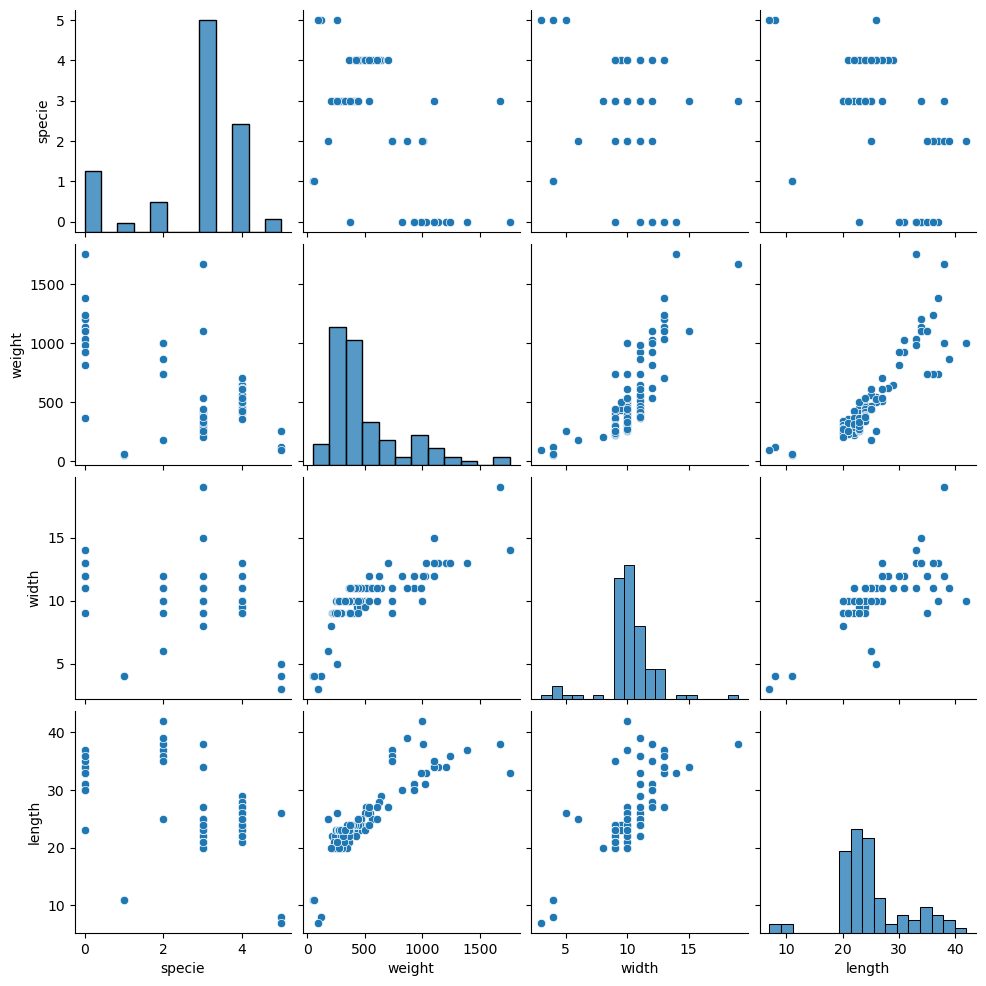

In [43]:
sns.pairplot(data)
plt.show()

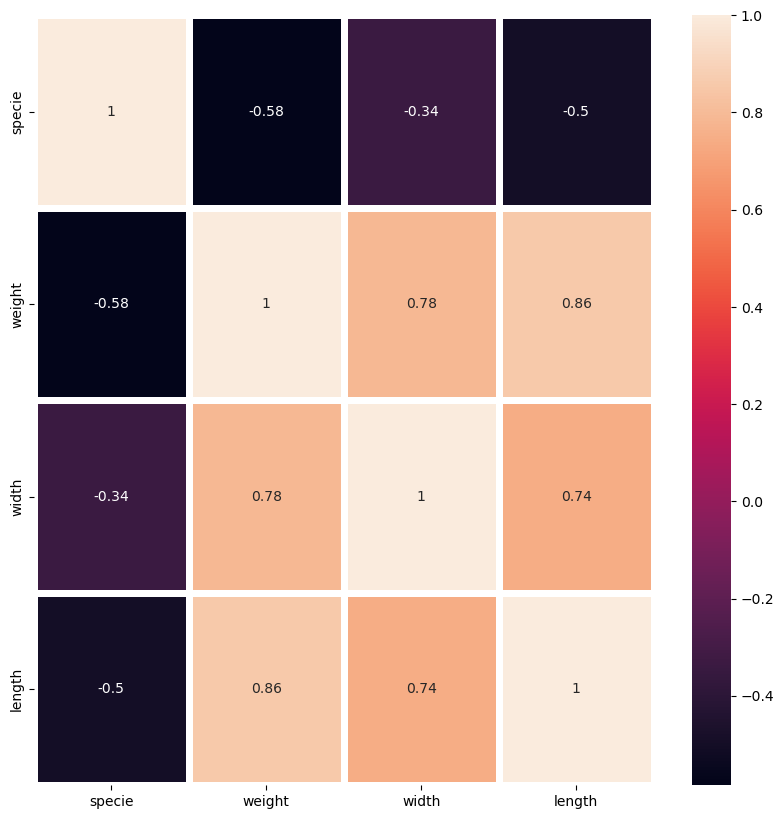

In [44]:
corr_view(data)

In [45]:
y = data.weight
X = data.drop(labels=['weight'], axis=1)
l = data.index

In [63]:
X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X.values, 
                                                    y.values,
                                                    l,
                                                    test_size=0.3, 
                                                    random_state=0)

In [61]:
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

In [64]:
run_all_regressions(X_train, 
                    X_test,
                    y_train,
                    y_test)


-----LinearRegression------
[Train] -------------
MAE: 91.035343850039
RMSE: 134.27403141554208
R2 Square 0.8353696881654047
[Test] --------------
MAE: 122.05162163636722
RMSE: 165.27725801197565
R2 Square 0.7696922491888712

-----Ridge------
[Train] -------------
MAE: 90.92921186531483
RMSE: 134.27862976101378
R2 Square 0.8353584121203868
[Test] --------------
MAE: 121.67084024514179
RMSE: 164.8455419737672
R2 Square 0.7708938385061417

-----RandomForest------
[Train] -------------
MAE: 54.73906903734634
RMSE: 94.73027634063989
R2 Square 0.9180586051165197
[Test] --------------
MAE: 72.68509967253567
RMSE: 143.3151406225826
R2 Square 0.8268324534253672


In [65]:
ApplyesKFold(X.values, y.values, k=5)

Linear Regression Mean (R^2):  0.7979947880518468  std:  0.06044208092781822
Elastic Net Mean (R^2):  0.7952339036531644  std:  0.06458734528190173
Ridge Mean (R^2):  0.7980969633698864  std:  0.060542492665125264
Lasso Mean (R^2):  0.7980442913049767  std:  0.060564376699757956
Random Forest Mean (R^2):  0.9004300110916962  std:  0.04859087843047263
MLP Mean (R^2):  -1.1871606582007095  std:  0.3317234771105969
RANSAC Mean (R^2):  0.4668415319164749  std:  0.5782610323588697

 Melhor modelo: Random Forest with value: 0.9004300110916962


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X.values, y.values)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score:  0.8364088372183502
